In [94]:
import numpy as np
from matplotlib import pyplot as plt
import time
import scipy.sparse
import scipy.linalg
from scipy.stats import ortho_group
import sys

$\mathbf{\text{Задача 1}}$



In [148]:
def generate_rand_band_matrix(N, gen_type):
    """
    gen_type = 0 - diagonal with 3 diags, stored as full matrix
    gen_type = 1 - 3 rows, sotred as full matrix
    gen_type = 2 - same as gen_type = 0 but stored as scipy sparce matrix
    """
    if gen_type == 0:
        d1 = np.random.uniform(-1, 1, size=N - 1)
        d2 = np.random.uniform(-1, 1, size=N)
        d3 = np.random.uniform(-1, 1, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    elif gen_type == 1:
        A = np.zeros([3, N])
        d1 = np.random.uniform(-1, 1, size=N)
        d2 = np.random.uniform(-1, 1, size=N)
        d3 = np.random.uniform(-1, 1, size=N)
        A[0] = d1
        A[1] = d2
        A[2] = d3
        return A
    else:
        d1 = np.random.uniform(-1, 1, size=N - 1)
        d2 = np.random.uniform(-1, 1, size=N)
        d3 = np.random.uniform(-1, 1, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])
    
def generate_const_band_matrix(N, A, B, C, gen_type):
    if gen_type == 0:
        d1 = A * np.ones(N-1)
        d2 = B * np.ones(N)
        d3 = C * np.ones(N-1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    elif gen_type == 1:
        A = np.zeros([N, N])
        d1 = A * np.ones(N)
        d2 = B * np.ones(N)
        d3 = C * np.ones(N)
        A[0] = d1
        A[int(N / 2)] = d2
        A[N - 1] = d3
        return A
    else:
        d1 = A * np.ones(N-1)
        d2 = B * np.ones(N)
        d3 = C * np.ones(N-1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])

def generate_eps_band_matrix(N, eps, gen_type):
    if gen_type == 0:
        d1 = np.random.uniform(-eps, eps, size=N - 1)
        d2 = np.random.uniform(-eps, eps, size=N)
        d3 = np.random.uniform(-eps, eps, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    elif gen_type == 1:
        A = np.zeros([N, N])
        d1 = np.random.uniform(-eps, eps, size=N)
        d2 = np.random.uniform(-eps, eps, size=N)
        d3 = np.random.uniform(-eps, eps, size=N)
        A[0] = d1
        A[int(N / 2)] = d2
        A[N - 1] = d3
        return A
    else:
        d1 = np.random.uniform(-eps, eps, size=N - 1)
        d2 = np.random.uniform(-eps, eps, size=N)
        d3 = np.random.uniform(-eps, eps, size=N - 1)
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])

def generate_band_matrix(N, d1, d2, d3, gen_type):
    if gen_type == 0:
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1, 0, 1]).toarray()
    elif gen_type == 1:
        A = np.zeros([N, N])
        A[0] = d1
        A[int(N / 2)] = d2
        A[N - 1] = d3
        return A
    else:
        diagonals = [d1, d2, d3]
        return scipy.sparse.diags(diagonals, [-1,0, 1])

In [95]:
A = generate_rand_band_matrix(5, 0)
print(A)
print(sys.getsizeof(A))

[[-0.97162736  0.15263643  0.          0.          0.        ]
 [-0.24904474 -0.44857354  0.12306425  0.          0.        ]
 [ 0.         -0.72909822 -0.87699756 -0.13929494  0.        ]
 [ 0.          0.         -0.34819399 -0.71024253  0.35645984]
 [ 0.          0.          0.         -0.36548117  0.16631738]]
312


In [140]:
A = generate_rand_band_matrix(5, 1)
print(A)
print(sys.getsizeof(A))
# f = np.ones(5)
# scipy.linalg.solve_banded((1, 1), A, f)

[[ 0.32265533  0.28821055  0.94324822 -0.81624444 -0.34857643]
 [-0.22607696  0.08311101 -0.63420119  0.13299183  0.33592779]
 [ 0.24274018 -0.07286443  0.66166682  0.34297482  0.29152046]]
232


In [97]:
A = generate_rand_band_matrix(5, 2)
print(A)
print(sys.getsizeof(A))

  (1, 0)	-0.720275298001873
  (2, 1)	0.9266309274672839
  (3, 2)	0.9220921795389394
  (4, 3)	0.87777777669015
  (0, 0)	0.21602633954897454
  (1, 1)	-0.44838991491800306
  (2, 2)	-0.4125175986939704
  (3, 3)	0.7213480730918567
  (4, 4)	0.8171180414153218
  (0, 1)	0.8045804936205116
  (1, 2)	0.7862007263476618
  (2, 3)	-0.6677699440074596
  (3, 4)	0.3369357181507304
64


Как видно, поледний способ требует значительно меньше памяти

Исследуем, как зависит скорость решения систем с трехдиагональными матрицами методами solve, solve_banded, spsolve модуля scipy.linalg

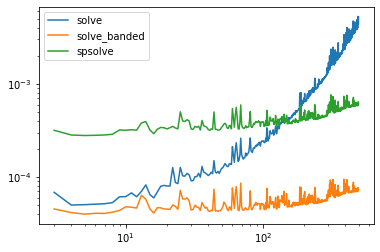

In [147]:
from scipy.sparse.linalg import spsolve
import scipy.sparse.linalg
times1 = []
times2 = []
times3 = []
N = 400
for i in range(3, N):
    avar_t1 = 0.0
    avar_t2 = 0.0
    avar_t3 = 0.0
    f = np.ones(i)
    for _ in range(100):
        A = generate_rand_band_matrix(i, 0)
        B = generate_rand_band_matrix(i, 2)
        C = generate_rand_band_matrix(i, 1)
        
        start = time.time()
        x = scipy.linalg.solve(A, f)
        end = time.time()
        avar_t1 += end - start  
        
        start = time.time()
        x = spsolve(B, f)
        end = time.time()
        avar_t3 += end - start  
        
        start = time.time()
        x = scipy.linalg.solve_banded((1, 1), C, f)
        end = time.time()
        avar_t2 += end - start 
    avar_t1 /= 100
    avar_t2 /= 100
    avar_t3 /= 100
    times1.append(avar_t1)
    times2.append(avar_t2)
    times3.append(avar_t3)
plt.plot(np.array(range(3, N)), times1, label='solve')
plt.plot(np.array(range(3, N)), times2, label='solve_banded')
plt.plot(np.array(range(3, N)), times3, label='spsolve')
plt.yscale('log')
plt.xscale('log')
plt.legend()

In [150]:
A = generate_rand_band_matrix(10, 2)
f = np.ones(10)
A = scipy.sparse.linalg.splu(A).solve(f)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:310: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


$\mathbf{\text{Задача 4}}$(без доказательства) 

Метод Гаусса требует $n^2 + (n-1)^2 + ... + 1^2 = \frac{n(n+1)(2n + 1)}{6} \sim \frac{n^3}{3}$

Так как на i-м шаге метода вращений Гивенса каждая строка вычисляется за $4(n-i)$ операций, то всего получим : $4n \cdot n + 4(n - 1) \cdot (n - 1) + ...  + 4$ \sim \frac{4n^3}{3}$

Сравним скорости работы QR и LU разложений

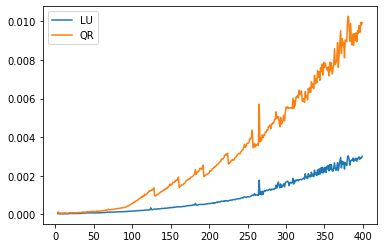

In [158]:
from scipy.sparse.linalg import spsolve
import scipy.sparse.linalg
times1 = []
times2 = []
N = 400
for i in range(3, N):
    avar_t1 = 0.0
    avar_t2 = 0.0
    f = np.ones(i)
    for _ in range(100):
        A = np.random.uniform(-1, 1, size=[i, i])
        start = time.time()
        p, l, u = scipy.linalg.lu(A)
        end = time.time()
        avar_t1 += end - start  
        
        start = time.time()
        q, r = scipy.linalg.qr(A)
        end = time.time()
        avar_t2 += end - start  
        
    avar_t1 /= 100
    avar_t2 /= 100
    times1.append(avar_t1)
    times2.append(avar_t2)
plt.plot(np.array(range(3, N)), times1, label='LU')
plt.plot(np.array(range(3, N)), times2, label='QR')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()

Видно, что QR разложение работает медленнее. Построим график отношения времен работ.

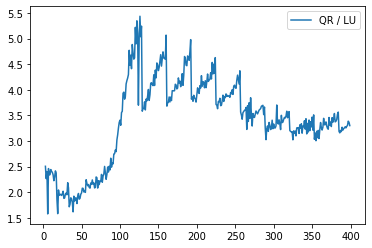

In [160]:
plt.plot(np.array(range(3, N)), np.array(times2) / np.array(times1), label='QR / LU')
plt.legend()

Видно, что для больших N, отношение близко к 4-м, хотя и стремится скорее к 3.5 (в силу особенностей библиотечных реализаций).

$\mathbf{\text{Задача 5}}$

Сравним скорость работы МПИ с точностью $10^{-9}$ с обычным методом LU разложения

In [51]:
def MPI(A, f, tau, eps, ITER_MAX=int(1e7)):
    A = np.array(A)
    f = np.array(f)
    n = A.shape[0]
    x = np.zeros(n)
    n_iter = 0
    for i in range(ITER_MAX):
        n_iter += 1
        x_old = x
        x = ((np.eye(n) - tau * A) @ x.reshape(n, 1)).reshape(1, n) + tau * f
        if np.linalg.norm(x - x_old) < eps:
            break
    return x, n_iter

In [17]:
A = np.array([
    [0.5, 1],
    [0, 0.5]
])
f = [1, 1]
MPI(A, f, 1, 1e-9)

(array([[-2.,  2.]]), 38)

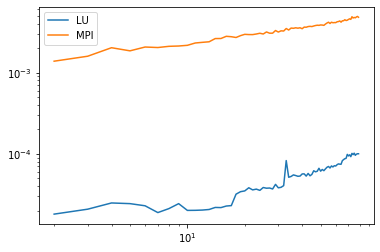

In [36]:
timesLU = []
timesMPI = []
N = 80
for i in range(2, N):
    avar_tLU = 0.0
    avar_tMPI = 0.0
    f = np.ones(i)
    for _ in range(100):
        A = np.diag(np.random.uniform(0.1, 0.9, size=i))
        Q = ortho_group.rvs(i)
        A = Q.T @ A @ Q
        start = time.time()
        x = np.linalg.solve(A, f)
        end = time.time()
        avar_tLU += end - start        
        start = time.time()
        x, iters = MPI(A, f, 1, 1e-9)
        end = time.time()
        avar_tMPI += end - start                
    avar_tLU /= 100
    avar_tMPI /= 100
    timesLU.append(avar_tLU)
    timesMPI.append(avar_tMPI)
plt.plot(np.array(range(2, N)), timesLU, label='LU')
plt.plot(np.array(range(2, N)), timesMPI, label='MPI')
plt.yscale('log')
plt.xscale('log')
plt.legend()

Как видно, написанный на питоне МПИ работает значительно дольше, чем написанный на плюсах LU в numpy. Однако, по графикам видно, что МПИ имеет заметно лучшую асимптотику. Кроме того, как будет видно в задаче 6, МПИ в целом требует большое число итераций.

$\mathbf{\text{Задача 6}}$



Для положительно определенных матриц наилучший параметр $\tau$ можно найти явно, как $\frac{2}{\lambda_{max} - \lambda_{min}}$. Данное утверждение доказано в файле "ProblemB3_6.pdf". Из рассуждений из доказательства также следует, что сходимость с некоторой скорости будет достигаться при $ 0 < \tau < \frac{2}{\lambda_{max}} $. Проверим это утверждение численным экспериментом.

In [68]:
N = 10
n = 10
N_convergencies = 0
f = np.ones(n)
for i in range(N):
    A = np.random.uniform(-1, 1, size=[n, n])
    A = A.T@A
    lambdas, vect = np.linalg.eig(A)
    l_max = np.max(lambdas)
    tau = np.random.uniform(0.0 + 1e-8, 2 / l_max - 1e-8)
    # tau = 2 / (l_min + l_max)
    l, vect = np.linalg.eig(tau * A - np.eye(n))
    # print(np.max(l))
    x, n_iter = MPI(A, f, tau, 1e-9)
    if n_iter < int(1e7):
        N_convergencies += 1
    print(n_iter)
print("There was " + str(N_convergencies) + " convergencies out of " + str(N))
    
    

66400
137900
2554242
58436
42046
2872
9016
5475353
18771
87246
There was 10 convergencies out of 10


Сходимость при предсказанных $\tau$ имеется, однако методу требуется очень большое число итераций.